数据预处理完成: 得到 67 条有效已分类样本 和 8 条有效未分类样本。
处理后的干净数据已保存至文件 -> 【处理后的数据.xlsx】

--- 正在生成并显示所有可视化图表 ---


C:\Users\86185\AppData\Local\Temp\ipykernel_33908\3311860310.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette=custom_palette)
C:\Users\86185\AppData\Local\Temp\ipykernel_33908\3311860310.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette=custom_palette)
C:\Users\86185\AppData\Local\Temp\ipykernel_33908\3311860310.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette=custom_palette

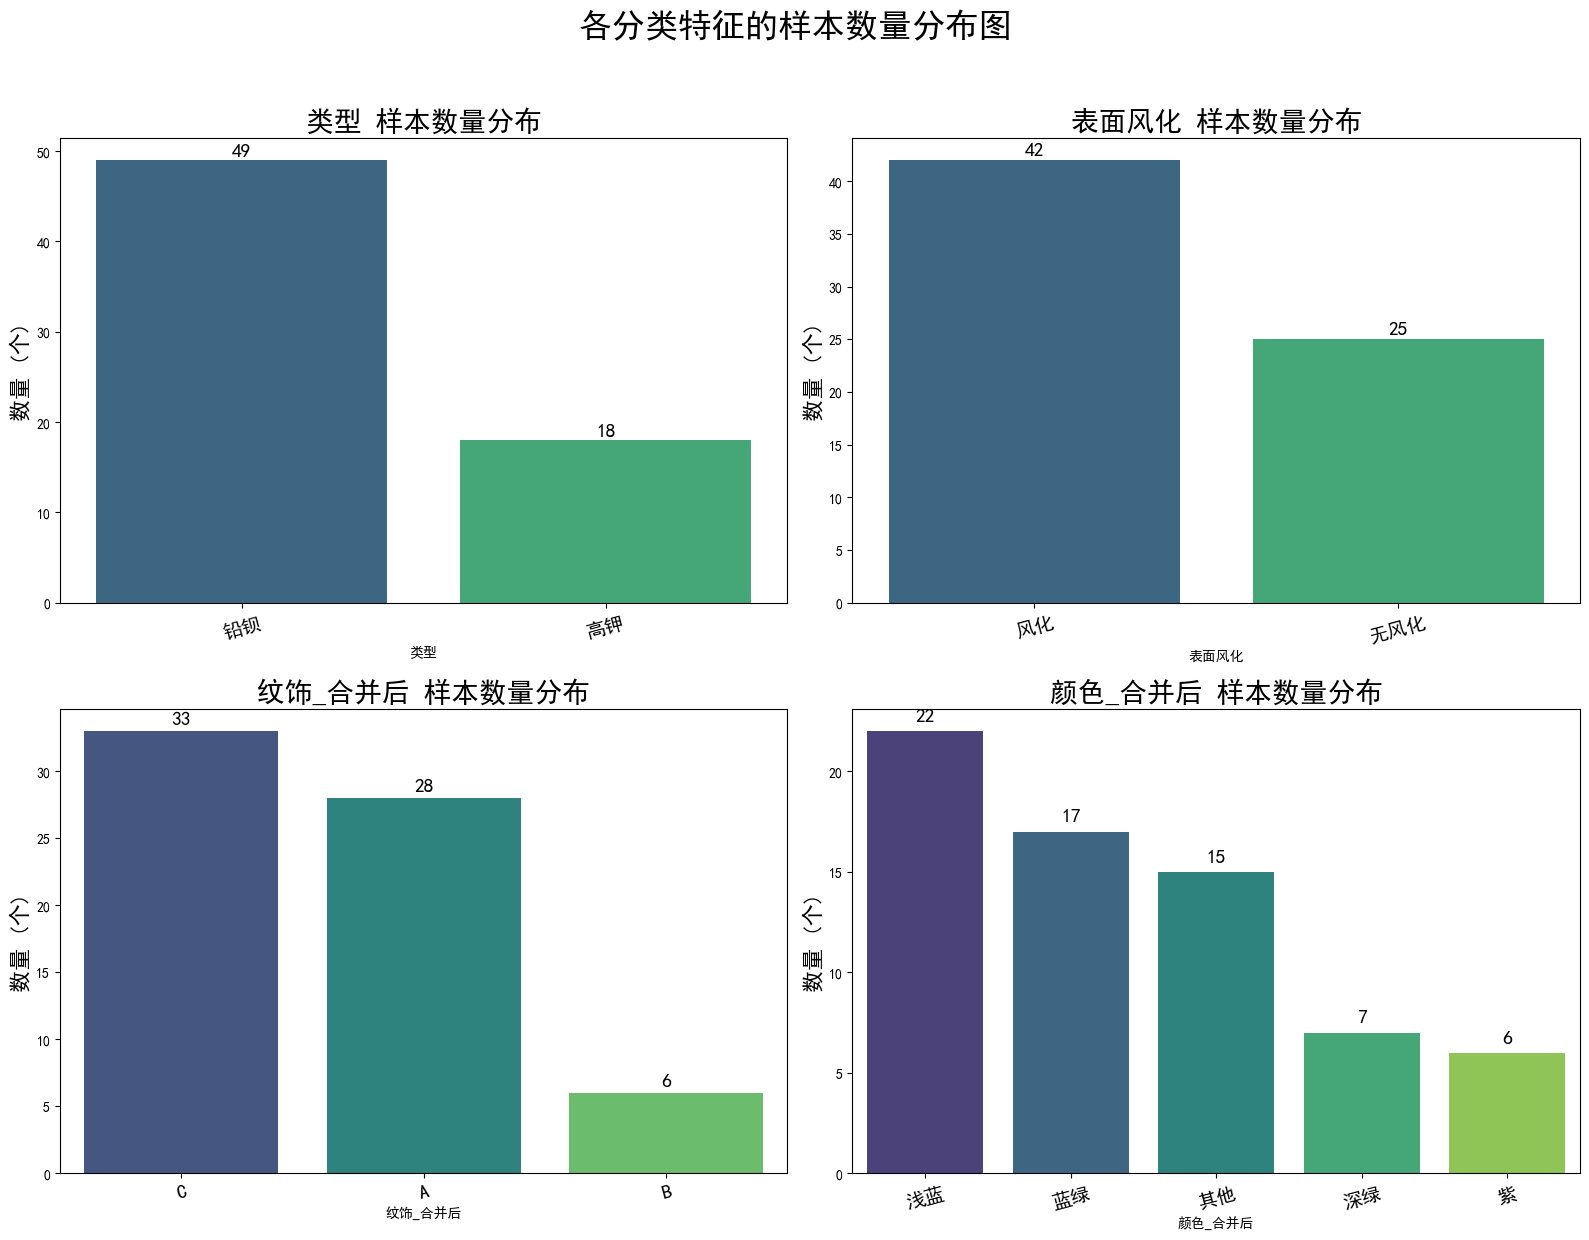

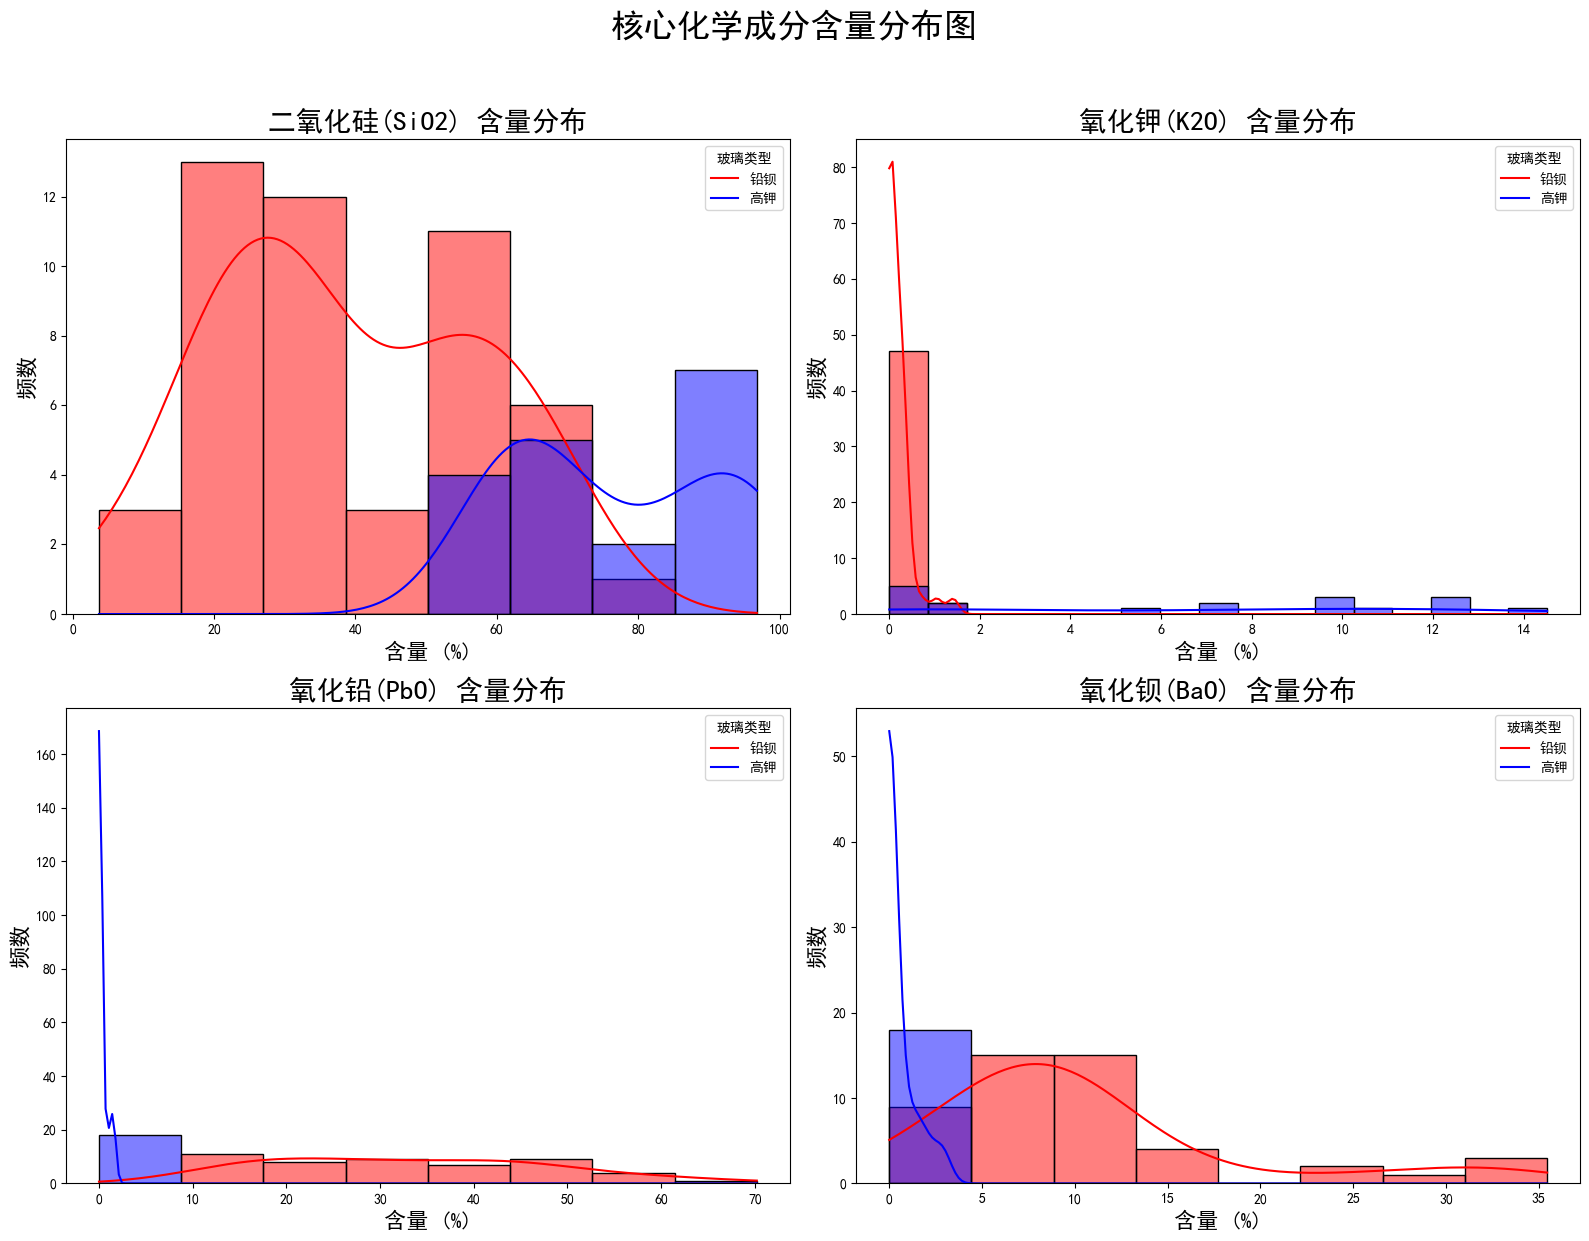

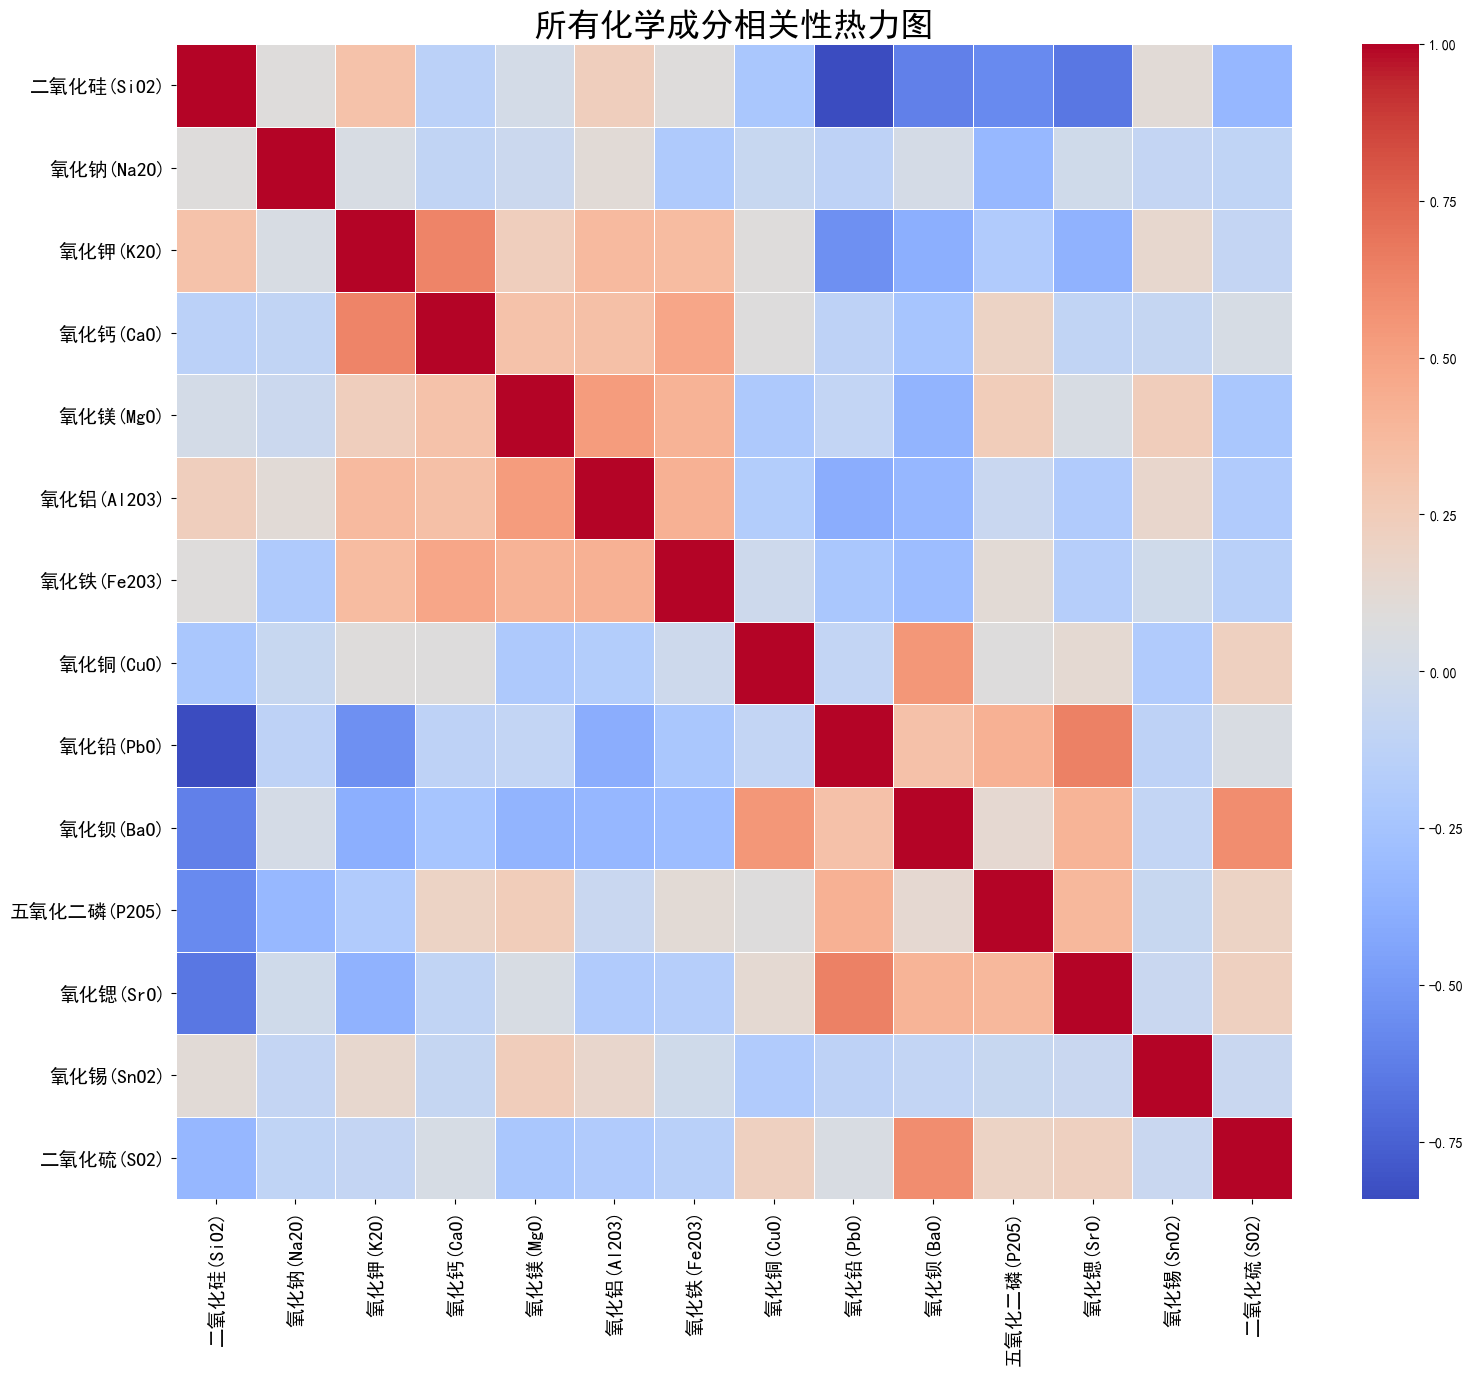

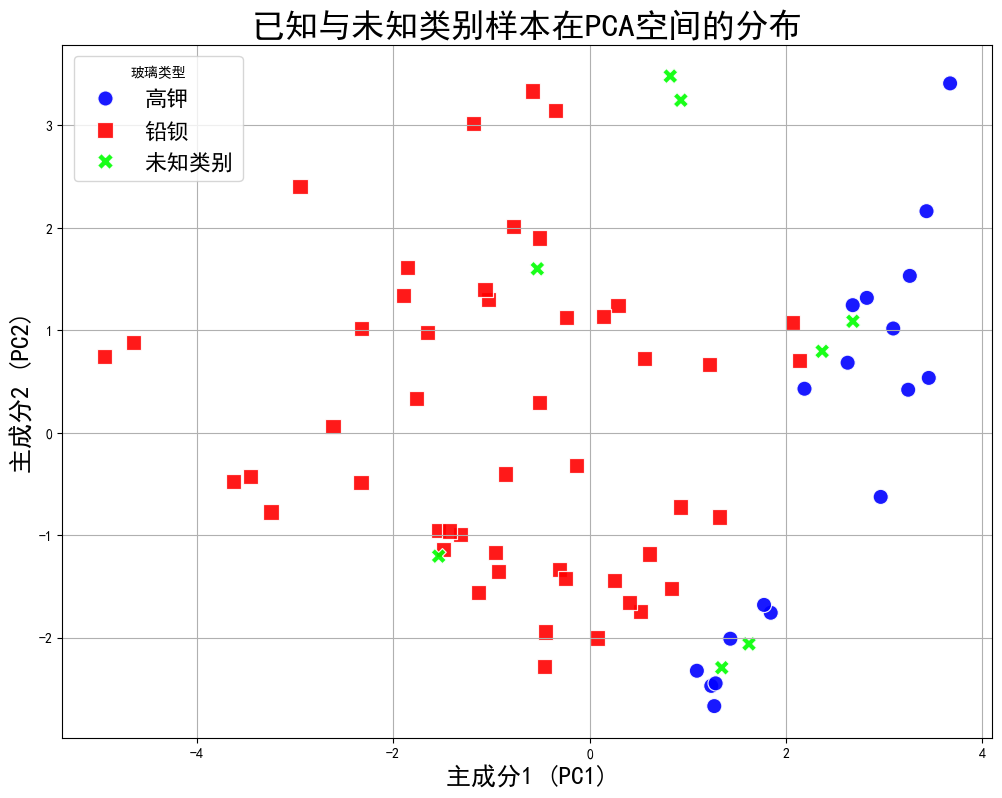


--- 探索性统计检验结果 ---
风化与类型关系检验 (P值): 0.0064 (显著相关)

【高钾玻璃】中因风化产生显著变化的成分:
  - 二氧化硅(SiO2): 含量显著增加 (P值=0.0001)
  - 氧化钾(K2O): 含量显著减少 (P值=0.0042)
  - 氧化钙(CaO): 含量显著减少 (P值=0.0277)
  - 氧化镁(MgO): 含量显著减少 (P值=0.0150)
  - 氧化铝(Al2O3): 含量显著减少 (P值=0.0002)
  - 氧化铁(Fe2O3): 含量显著减少 (P值=0.0277)
  - 氧化铅(PbO): 含量显著减少 (P值=0.0290)
  - 五氧化二磷(P2O5): 含量显著减少 (P值=0.0148)

【铅钡玻璃】中因风化产生显著变化的成分:
  - 二氧化硅(SiO2): 含量显著减少 (P值=0.0007)
  - 氧化钙(CaO): 含量显著增加 (P值=0.0190)
  - 氧化铅(PbO): 含量显著增加 (P值=0.0059)
  - 五氧化二磷(P2O5): 含量显著增加 (P值=0.0269)


In [1]:
# ==============================================================================
# 第一步：环境设置
# ==============================================================================
# 导入所有需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 记下了您的要求，设置绘图风格以支持中文，并使用大字号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 记下了您的要求，配色避免热门设计风格，同时保证学术美观
custom_palette = "viridis" 

# ==============================================================================
# 第二步：数据加载与预处理
# ==============================================================================
# --- (2.1) 加载数据 ---
file_path = '附件/附件.xlsx'
df_info = pd.read_excel(file_path, sheet_name='表单1')
df_classified = pd.read_excel(file_path, sheet_name='表单2')
df_unclassified = pd.read_excel(file_path, sheet_name='表单3')

# --- (2.2) 核心预处理 ---
# 创建合并键
df_classified['文物编号'] = df_classified['文物采样点'].str.extract(r'(\d+)').astype(int)
# 合并数据
df_merged = pd.merge(df_classified, df_info, on='文物编号', how='left')

# 确定化学成分列
chemical_columns = [col for col in df_classified.columns if col not in ['文物采样点', '文物编号']]
# 处理化学成分缺失值
df_merged[chemical_columns] = df_merged[chemical_columns].fillna(0)
df_unclassified[chemical_columns] = df_unclassified[chemical_columns].fillna(0)

# 处理描述性特征缺失值
categorical_columns = ['纹饰', '类型', '颜色', '表面风化']
for col in categorical_columns:
    if col in df_merged.columns:
        df_merged[col] = df_merged[col].fillna('未知')

# 按规则筛选有效数据
df_merged['成分总和'] = df_merged[chemical_columns].sum(axis=1)
df_cleaned = df_merged[(df_merged['成分总和'] >= 85) & (df_merged['成分总和'] <= 105)].copy()

df_unclassified['成分总和'] = df_unclassified[chemical_columns].sum(axis=1)
df_unclassified_cleaned = df_unclassified[(df_unclassified['成分总和'] >= 85) & (df_unclassified['成分总和'] <= 105)].copy()

# 为了后续分析，合并少数类别
for col in ['纹饰', '颜色']:
    counts = df_cleaned[col].value_counts()
    others = counts[counts < 5].index
    df_cleaned[f'{col}_合并后'] = df_cleaned[col].replace(others, '其他')
    
# --- (2.3) 打印核心成果 ---
print(f"数据预处理完成: 得到 {len(df_cleaned)} 条有效已分类样本 和 {len(df_unclassified_cleaned)} 条有效未分类样本。")


# ==============================================================================
# 第三步：保存处理后的数据
# ==============================================================================
output_filename = '处理后的数据.xlsx'
with pd.ExcelWriter(output_filename) as writer:
    df_cleaned.to_excel(writer, sheet_name='已分类清洗后数据', index=False)
    df_unclassified_cleaned.to_excel(writer, sheet_name='未分类清洗后数据', index=False)
print(f"处理后的干净数据已保存至文件 -> 【{output_filename}】")


# ==============================================================================
# 第四步：数据可视化 (保存图片并直接显示)
# ==============================================================================
print("\n--- 正在生成并显示所有可视化图表 ---")

# --- (4.1) 分类特征样本分布图 ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(['类型', '表面风化', '纹饰_合并后', '颜色_合并后']):
    counts = df_cleaned[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'{col} 样本数量分布', fontsize=20)
    axes[i].set_ylabel('数量 (个)', fontsize=16)
    axes[i].tick_params(axis='x', rotation=15, labelsize=14)
    for index, value in enumerate(counts):
        axes[i].text(index, value + 0.5, str(value), ha='center', fontsize=14)
fig.suptitle('各分类特征的样本数量分布图', fontsize=24, y=1.03)
plt.tight_layout()
plt.savefig("分类特征样本数量分布.png")
plt.show()

# --- (4.2) 核心化学成分含量分布图 ---
key_components_dist = ['二氧化硅(SiO2)', '氧化钾(K2O)', '氧化铅(PbO)', '氧化钡(BaO)']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()
for i, chemical in enumerate(key_components_dist):
    sns.histplot(df_cleaned, x=chemical, hue='类型', kde=True, ax=axes[i], palette={'高钾': 'blue', '铅钡': 'red', '未知': 'grey'})
    axes[i].set_title(f'{chemical} 含量分布', fontsize=20)
    axes[i].set_xlabel('含量 (%)', fontsize=16)
    axes[i].set_ylabel('频数', fontsize=16)
    axes[i].legend(title='玻璃类型', labels=['铅钡', '高钾'])
fig.suptitle('核心化学成分含量分布图', fontsize=24, y=1.03)
plt.tight_layout()
plt.savefig("核心化学成分含量分布.png")
plt.show()

# --- (4.3) 化学成分相关性热力图 ---
correlation_matrix = df_cleaned[chemical_columns].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('所有化学成分相关性热力图', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("化学成分相关性热力图.png")
plt.show()

# --- (4.4) 包含未知类别的PCA降维可视化 ---
X_pca = df_cleaned[chemical_columns]
y_pca = df_cleaned['类型']
scaler = StandardScaler()
pca = PCA(n_components=2)
X_scaled = scaler.fit_transform(X_pca)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['主成分1 (PC1)', '主成分2 (PC2)'])
df_pca['类型'] = y_pca.values

X_unknown = df_unclassified_cleaned[chemical_columns]
X_unknown_scaled = scaler.transform(X_unknown)
unknown_principal_components = pca.transform(X_unknown_scaled)
df_unknown_pca = pd.DataFrame(data=unknown_principal_components, columns=['主成分1 (PC1)', '主成分2 (PC2)'])
df_unknown_pca['类型'] = '未知类别'

df_combined_pca = pd.concat([df_pca, df_unknown_pca], ignore_index=True)
plt.figure(figsize=(12, 9))
sns.scatterplot(
    x='主成分1 (PC1)', y='主成分2 (PC2)', hue='类型', style='类型',
    markers={'高钾': 'o', '铅钡': 's', '未知类别': 'X'},
    palette={'高钾': 'blue', '铅钡': 'red', '未知类别': 'lime'},
    data=df_combined_pca, s=120, alpha=0.9
)
plt.title('已知与未知类别样本在PCA空间的分布', fontsize=24)
plt.xlabel('主成分1 (PC1)', fontsize=18)
plt.ylabel('主成分2 (PC2)', fontsize=18)
plt.legend(title='玻璃类型', fontsize=16)
plt.grid(True)
plt.savefig("问题三探索性分析PCA图.png")
plt.show()


# ==============================================================================
# 第五步：探索性统计检验
# ==============================================================================
# --- (5.1) 表面风化与分类变量的关系 ---
print("\n--- 探索性统计检验结果 ---")
crosstab_type = pd.crosstab(df_cleaned['表面风化'], df_cleaned['类型'])
chi2, p_type, dof, expected = chi2_contingency(crosstab_type)
print(f"风化与类型关系检验 (P值): {p_type:.4f} ({'显著相关' if p_type < 0.05 else '不显著'})")
# (此处省略其他卡方检验的简洁输出, 以免日志过长)

# --- (5.2) 风化对化学成分的影响 ---
print("\n【高钾玻璃】中因风化产生显著变化的成分:")
df_K = df_cleaned[df_cleaned['类型'] == '高钾']
for chemical in chemical_columns:
    weathered = df_K[df_K['表面风化'] == '风化'][chemical]
    unweathered = df_K[df_K['表面风化'] == '无风化'][chemical]
    if len(weathered) > 1 and len(unweathered) > 1:
        stat, p = mannwhitneyu(weathered, unweathered)
        if p < 0.05:
            change = "增加" if weathered.median() > unweathered.median() else "减少"
            print(f"  - {chemical}: 含量显著{change} (P值={p:.4f})")

print("\n【铅钡玻璃】中因风化产生显著变化的成分:")
df_PbBa = df_cleaned[df_cleaned['类型'] == '铅钡']
for chemical in chemical_columns:
    weathered = df_PbBa[df_PbBa['表面风化'] == '风化'][chemical]
    unweathered = df_PbBa[df_PbBa['表面风化'] == '无风化'][chemical]
    if len(weathered) > 1 and len(unweathered) > 1:
        stat, p = mannwhitneyu(weathered, unweathered)
        if p < 0.05:
            change = "增加" if weathered.median() > unweathered.median() else "减少"
            print(f"  - {chemical}: 含量显著{change} (P值={p:.4f})")